In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering as ac
from scipy.cluster.hierarchy import dendrogram
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.io as pio
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as clust
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,LassoCV,Lasso
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import kaleido

# ToyotaCorolla

## Part A. 
### A simple predictive model of the target variable - "simple" meaning choose just ONE explanatory variable.  
#### How did you choose the explanatory variable?
><font color='blue'> By observing the heatmap, we can find Mfg_Year has the highest correlation coefficient with Price among all variables, so I choose Mfg_Year as my explanatory variable. </font>

#### Does your model under or overfit the data?  How do you know?
><font color='blue'> Since R-square is high on training data and test data, and MAPE in training data are lower than in test data, this model perform well. </font>

In [2]:
# Cleaning up data
df3 = pd.read_csv('ToyotaCorolla.csv') # Reading data
df3.isnull().sum() # Checking missing values
df3[df3.duplicated()].count() # Checking duplicate values

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


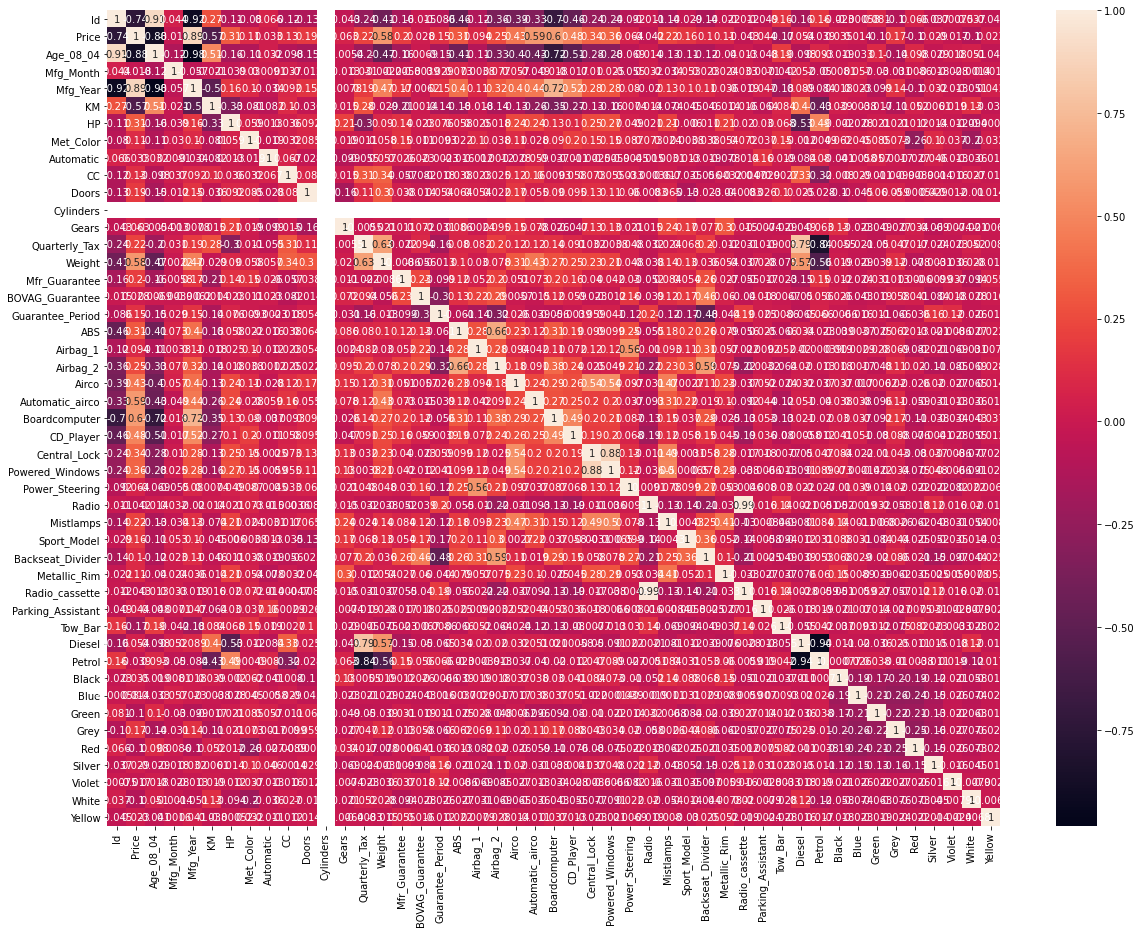

In [3]:
#EDA
display(df3.describe())
#display(df3.hist())

# Selecting Numeric Data

NumericData = df3.select_dtypes(include='number')

# Normalizing Numeric Data
NumericDataNorm = (NumericData - NumericData.mean())/NumericData.std()

# Dealing with catogrical varaible
Dummy1 = pd.get_dummies(df3['Model'], drop_first=True)
Dummy2 = pd.get_dummies(df3['Fuel_Type'], drop_first=True)
Dummy3 = pd.get_dummies(df3['Color'], drop_first=True)

# Dropping the first column to avoid dummy variable trap

# Combine Data
df3norm = pd.concat([NumericDataNorm, Dummy1, Dummy2, Dummy3], axis=1)

# Heatmap
df3heatmap = pd.concat([NumericDataNorm, Dummy2, Dummy3], axis=1)
# Caculate correlation coefficients.
plt.figure(figsize=(20, 15))
sns.heatmap(df3heatmap.corr(),annot=True)
plt.show()




In [4]:
# Splitting data

X=df3norm[['Mfg_Year']]  # Putting DISTANCE as independent variable
y=df3norm['Price']      # Putting FARE as dependent variable 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [5]:
# Showing performance

# Creating formula

def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create MAE
    mae = mean_absolute_error(y_train,y_hat).round(3)
    
    # Create MAPE
    mape = mean_absolute_percentage_error(y_train,y_hat).round(3)*100
    
    # Create MSE
    mse = (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
    
    train_metrics = [r2, mae, mape,mse]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    
    print(pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)}))
    print('\n')
    print(all_metrics)
    print('\n')
def data_model_plot(X_train,X_test,y_train,y_test,model):

    x_train_sorted = X_train.copy()
    y_train_pred = model.predict(X_train)

    x_train_sorted.insert(1,'y_train_hat',y_train_pred)
    x_train_sorted.sort_values(by='Mfg_Year',ascending=True,inplace=True)

    x_test_sorted = X_test.copy()
    y_test_pred = model.predict(X_test)

    x_test_sorted.insert(1,'y_test_hat',y_test_pred)
    x_test_sorted.sort_values(by='Mfg_Year',ascending=True,inplace=True)

    trace0 = dict(mode='markers',
                  type='scatter',
                  name='Training Data',
                  marker = dict(size=10,
                                line=dict(width=1,
                                          color='DarkSlateGrey'),
                                opacity=0.7
                               ),
                  x=X_train.iloc[:,0],
                  y=y_train,
                  xaxis='x1',
                  yaxis='y'
                 )
    trace1 = dict(mode='markers',
                  type='scatter',
                  name='Test Data',
                  marker = dict(size=10,
                                line=dict(width=1,
                                          color='DarkSlateGrey'),
                                opacity=0.7
                               ),
                  x=X_test.iloc[:,0],
                  y=y_test,
                  xaxis='x2',
                  yaxis='y'
                 )

    trace2 = dict(mode='lines',
                  type='scatter',
                  name='Model->Train',
                  x=x_train_sorted.iloc[:,0],
                  y=x_train_sorted['y_train_hat'],
                  xaxis='x1',
                  yaxis='y'
                 )
    trace3 = dict(mode='lines',
                  type='scatter',
                  name='Model->Test',
                  x=x_test_sorted.iloc[:,0],
                  y=x_test_sorted['y_test_hat'],
                  xaxis='x2',
                  yaxis='y'
                 )
    layout = dict(title='Train vs Test',
                  xaxis1 = dict(title='Explanatory Variable',
                                showgrid=False,
                                anchor='y',
                                domain=[0,0.45]
                               ),
                  xaxis2 = dict(title='Explanatory Variable',
                                showgrid=False,
                                anchor='y',
                                domain=[0.55,1]
                               ),              
                  yaxis = dict(title='Target Variable',
                               showgrid=False,
                               zeroline=False
                              ),
                  plot_bgcolor='#eee8e8',
                  height=500,
                  width=900
                 )


    plot_data = [trace0,trace1,trace2,trace3]

    # Bring data and layout objects together in a single figure
    fig = go.Figure(plot_data,layout)

    # Render the figure
    return fig.show('png')

def display_output(X_train,X_test,y_train,y_test,model):
    print(pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_}))
    print('\n')
    print(train_test_metrics(X_train,X_test,y_train,y_test,model))
    print('\n')
    data_model_plot(X_train,X_test,y_train,y_test,model)


  Predictor  coefficent
0  Mfg_Year    0.887154


  Predictor  coefficent
0  Mfg_Year       0.887


        Train     Test
R2      0.782    0.785
MAE     0.327    0.342
MAPE  194.700  154.300
SSE   221.815   88.901


None




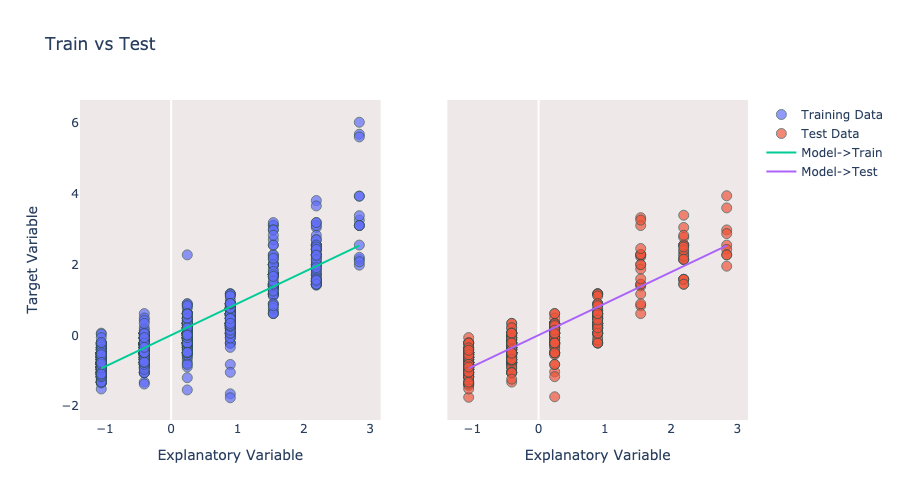

In [6]:
# Building regression

lin_model = LinearRegression()    
lin_model.fit(x_train, y_train) 


# Show regression plot and results
    
display_output(x_train,x_test,y_train,y_test,lin_model)

## Part B. 
### Create a slightly more complicated predictive model of the target variable.  In particular, add 1-3 more variables that you think have potential to improve your model.

><font color='blue'> By observing the heatmap, we can find the three variables with the highest correlation coefficient with Price in descending order are Mfg_Year, Age_08_04,and Id. </font>

#### Take note of any differences in model performance from 1. to 2.

><font color='blue'> R-square in the new model is higher than in the old model, and MAE, MAPE, and SSE in the new model are lower than in the old model. MAPE in training set of the new model is lower than in test set, so the new model is better than old model. </font>

#### Do you notice any major changes in the magnitudes of your parameter estimates?  

><font color='blue'> Compared to the first regression model, Mfg_Year in this new model has a higher coefficient. Another fact is LSTAT has the highest coefficient in this new model.</font>

#### Pick one parameter estimate and, in words, describe what it means?

><font color='blue'> The coefficient of Mfg_Year means for every one unit increase in Mfg_Year, Price will increase by 1.117 units.</font>

In [7]:
# Splitting data

X=df3norm[["Mfg_Year", "Age_08_04", "Id"]]  
y=df3norm['Price']      # Putting FARE as dependent variable 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

   Predictor  coefficent
0   Mfg_Year    1.117378
1  Age_08_04   -0.239828
2         Id    0.501195


   Predictor  coefficent
0   Mfg_Year       1.117
1  Age_08_04      -0.240
2         Id       0.501


        Train     Test
R2      0.821    0.822
MAE     0.292    0.304
MAPE  133.500  127.100
SSE   181.867   73.783


None




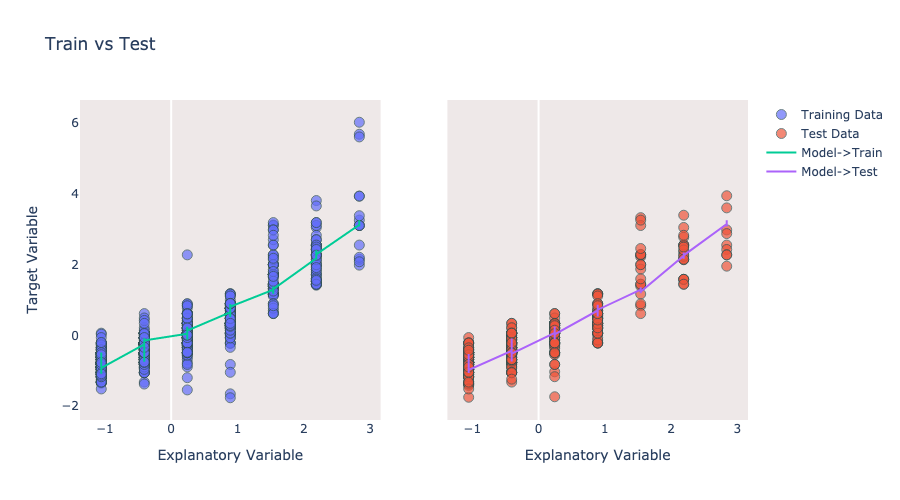

In [8]:
# Building regression

lin_model = LinearRegression()    
lin_model.fit(x_train, y_train) 

# Show regression plot and results
    
display_output(x_train,x_test,y_train,y_test,lin_model)

## Part C. 
### Add all potential explanatory variables to your model and any data transformations you think could be helpful.  Use Ridge or Lasso regression in collaboration with Cross-Validation to arrive at a final model form. Note: your use of the methods above should result in some parameters dropping out of your model - take note of which parameters and associated variables are important to good model fit and a low degree of model variability.

><font color='blue'> The Final Model is the best model with a low MAPE score, a low MAE score, and a high R-square score in both train and test data, which is 0.963  and 0.840. Age_08_04, Mfg_Year, Weight, and category variables Model and Fuel_Type are important to good model and a low degree of model variability.</font>

In [9]:
# After normalizing, some values become too small, fill with 0
df3norm.fillna(0,inplace=True)

X = df3norm.loc[:, df3norm.columns != 'Price']
y = df3norm['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=109)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = RidgeCV(alphas=r_alphas)
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

     Predictor  coefficent
0           Id       0.003
1    Age_08_04      -0.251
2    Mfg_Month      -0.032
3     Mfg_Year       0.259
4           KM      -0.176
..         ...         ...
359        Red       0.043
360     Silver       0.094
361     Violet      -0.164
362      White      -0.071
363     Yellow       0.045

[364 rows x 2 columns]


       Train    Test
R2     0.963   0.840
MAE    0.147   0.236
MAPE  99.300  83.400
SSE   38.122  66.122




In [10]:
# Find predictor whose absolute value of coefficent is greater than 0.5
pd.set_option("display.max_rows", None, "display.max_columns", None)
dfcoef = pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_})
display(dfcoef[dfcoef['coefficent'].abs()>=0.2])





,Predictor,coefficent
1,Age_08_04,-0.251409
3,Mfg_Year,0.258687
13,Weight,0.385073
35,TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan...,-0.430955
41,TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA AUT3 ...,0.207424
46,TOYOTA Corolla 1.3 16V LB Linea Luna 4/5-Doors,0.419435
47,TOYOTA Corolla 1.3 16V LIFTB G6 4/5-Doors,0.236177
50,TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA AUT3 ...,0.232271
52,TOYOTA Corolla 1.3 16V Linea Terra 4/5-Doors,0.400810
53,TOYOTA Corolla 1.3 16V Linea Terra Liftb 2/3-D...,0.588641
